In [3]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
import itertools
from time import time
import fasttext

In [2]:
base_data_dir = "data/Tobacco3482-OCR/"
list_dir = os.listdir(base_data_dir)
print(str(list_dir))
nbs = []
x = []
y = []
for repo in list_dir:
    prefix = base_data_dir + repo + '/'
    files = os.listdir(prefix)
    for file in files:
        with open(prefix + file, 'r') as f:
            txt = f.read()
        x.append(txt)
        y.append(repo)
    nbs.append(str(len(files)))
print(str(nbs))
x = np.array(x)
y = np.array(y)

['Report', 'Email', 'News', 'Form', 'Memo', 'Advertisement', 'Scientific', 'Letter', 'Note', 'Resume']
['265', '599', '188', '431', '620', '230', '261', '567', '201', '120']


In [12]:
for i in range(x.shape[0]):
    x[i] = x[i].replace('\n', ' ')
with open('tobacco_nolabel.txt', 'w') as f:
    for i in x:
        f.write(i + '\n')

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
with open('tobacco_train.txt', 'w') as f:
    for i in range(x_train.shape[0]):
        line = x_train[i] + ' __label__' + y_train[i] + '\n'
        f.write(line)
with open('tobacco_test.txt', 'w') as f:
    for i in range(x_test.shape[0]):
        line = x_test[i] + ' __label__' + y_test[i] + '\n'
        f.write(line)

In [6]:
y[300]

'Memo'

In [7]:
x[300]

'SLevrillard  MEMORANDUM September 24, 1993 TO: W. R. Deaton FROM: E. F. DeLaura RE: Panel Results: Harley Lights 100 MM R&D #1385-6/93  Attached are the Low Tar panel results for The Harley Lights V 1OOMM proto.  Results for the previously reported Harley Lights V 85 MM and the Regular brand are also shown as a source of  reference.  Just to note, the Regular brand testing in which these Low Tar NM panel members tested their own brand blinded, will serve as benchmark data in this and subsequent/panel memos.  The Regular brand results represent the "ideal ratings" as most respondents were extremely favorable in their  evaluations for their regular brand (in test).  Product Specs are as follows:  Harley Lts. 100 MM 9.8 mgs. tar -71 mgs. nic. Harley Lts. 85 MM 8.5 mgs. tar .66 mgs. nic. Conclusions  The Harley Lts. 100 MM proto (1385-6-93) attained an average acceptance of 6.5 among total respondents. While the product scored well among 100 MM and smokers 30 years of age and over, it net

In [3]:
true_labels = []
pred_labels = []
texts = []
clf = fasttext.supervised('tobacco_train.txt', 'model', epoch=100)
with open('tobacco_test.txt') as f:
    for line in f:
        spli = line.split("__label__")
        true_labels.append(spli[1].replace("\n", ""))
        texts.append(spli[0])
pred_labels = [e[0] for e in clf.predict(texts)]


In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
Normalized confusion matrix


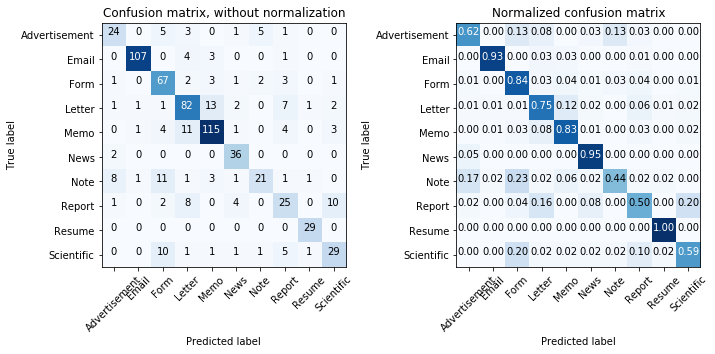

Test Accuracy: 0.7675753228120517


In [9]:
class_names = np.unique(true_labels)
conf_mat = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10,10))
plt.subplot(121)
plot_confusion_matrix(conf_mat, class_names, title='Confusion matrix, without normalization')
plt.subplot(122)
plot_confusion_matrix(conf_mat, class_names, normalize=True, title='Normalized confusion matrix')
plt.show()
print("Test Accuracy:", accuracy_score(true_labels, pred_labels))

# Train word vectors with FastText Skipgram

In [4]:
tic = time()
model_skipgram = fasttext.skipgram('tobacco_nolabel.txt', 
                                   'ft_skipgram_300',
                                   dim=300,
                                   epoch=20,
                                   thread=8)
toc = time()
print(toc - tic)

183.6263415813446
